In [3]:
# connect to the database
# to get the skills included in each program
# and the target variable employed_infield_180days

import pandas as pd
import psycopg2
import psycopg2.extras
import seaborn as sns
import matplotlib.pylab as plt
from config2 import params2

conn = psycopg2.connect(**params2)
cursor = conn.cursor()

cmd = f"""select
    s.skill,
    ps.skill_value,
    (CAST (round(pd.employed_infield_180days) AS INTEGER)) as employed_infield_180days
from bootcamps_edu.Program_Skill ps
join bootcamps_edu.Skill s
    on s.id = ps.skill_id
join bootcamps_edu.Program_Date pd
    on pd.id = ps.school_program_date_id
where ps.skill_value = 1
order by 1
"""
cursor.execute(cmd)
school_lst = cursor.fetchall()

school_df = pd.DataFrame(school_lst, columns =['skill', 'value', 'employed_infield_180days'])

school_df['skill_group'] = ''

school_df.loc[school_df["skill"] == "advanced_topics", "skill_group"] = "Data Analytics"
school_df.loc[school_df["skill"] == "anomaly_detection", "skill_group"] = "Data Analytics"
school_df.loc[school_df["skill"] == "applied_stats", "skill_group"] = "Data Analytics"
school_df.loc[school_df["skill"] == "classification", "skill_group"] = "Data Analytics"
school_df.loc[school_df["skill"] == "clustering", "skill_group"] = "Data Analytics"
school_df.loc[school_df["skill"] == "domain_expertise_development", "skill_group"] = "Data Analytics"
school_df.loc[school_df["skill"] == "language_processing", "skill_group"] = "Data Analytics"
school_df.loc[school_df["skill"] == "machine_learning", "skill_group"] = "Data Analytics"
school_df.loc[school_df["skill"] == "regression", "skill_group"] = "Data Analytics"
school_df.loc[school_df["skill"] == "story_telling_with_data", "skill_group"] = "Data Analytics"
school_df.loc[school_df["skill"] == "time_series_analysis", "skill_group"] = "Data Analytics"
school_df.loc[school_df["skill"] == "python", "skill_group"] = "Data Analytics"
school_df.loc[school_df["skill"] == "r", "skill_group"] = "Data Analytics"

school_df.loc[school_df["skill"] == "csharp_net", "skill_group"] = "Software Development"
school_df.loc[school_df["skill"] == "css", "skill_group"] = "Software Development"
school_df.loc[school_df["skill"] == "es6", "skill_group"] = "Software Development"
school_df.loc[school_df["skill"] == "heroku", "skill_group"] = "Software Development"
school_df.loc[school_df["skill"] == "html", "skill_group"] = "Software Development"
school_df.loc[school_df["skill"] == "java", "skill_group"] = "Software Development"
school_df.loc[school_df["skill"] == "javascript", "skill_group"] = "Software Development"
school_df.loc[school_df["skill"] == "jquery", "skill_group"] = "Software Development"
school_df.loc[school_df["skill"] == "nodejs", "skill_group"] = "Software Development"
school_df.loc[school_df["skill"] == "reactjs", "skill_group"] = "Software Development"

school_df.loc[school_df["skill"] == "firebase", "skill_group"] = "Databases"
school_df.loc[school_df["skill"] == "mongodb", "skill_group"] = "Databases"
school_df.loc[school_df["skill"] == "mysql", "skill_group"] = "Databases"
school_df.loc[school_df["skill"] == "postgress", "skill_group"] = "Databases"
school_df.loc[school_df["skill"] == "sql", "skill_group"] = "Databases"

school_df.loc[school_df["skill"] == "api", "skill_group"] = "Software Administration"
school_df.loc[school_df["skill"] == "spring", "skill_group"] = "Software Administration"
school_df.loc[school_df["skill"] == "git", "skill_group"] = "Software Administration"



school_df


,skill,value,employed_infield_180days,skill_group
0,advanced_topics,1,100,Data Analytics
1,advanced_topics,1,88,Data Analytics
2,advanced_topics,1,85,Data Analytics
3,advanced_topics,1,81,Data Analytics
4,advanced_topics,1,86,Data Analytics
...,...,...,...,...
423,time_series_analysis,1,86,Data Analytics
424,time_series_analysis,1,81,Data Analytics
425,time_series_analysis,1,85,Data Analytics
426,time_series_analysis,1,100,Data Analytics


Text(0.5, 1.0, 'employment rate by skill')

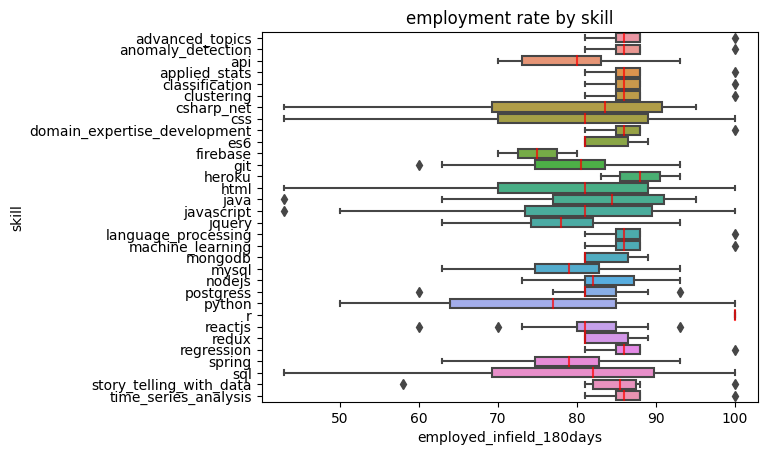

In [4]:
# create a plot for skills and employed_infield_180days

sns.boxplot(x = school_df['employed_infield_180days'], y = school_df['skill'], medianprops=dict(color="red", alpha=0.7))
plt.title('employment rate by skill')

Text(0.5, 1.0, 'employment rate by group of skills')

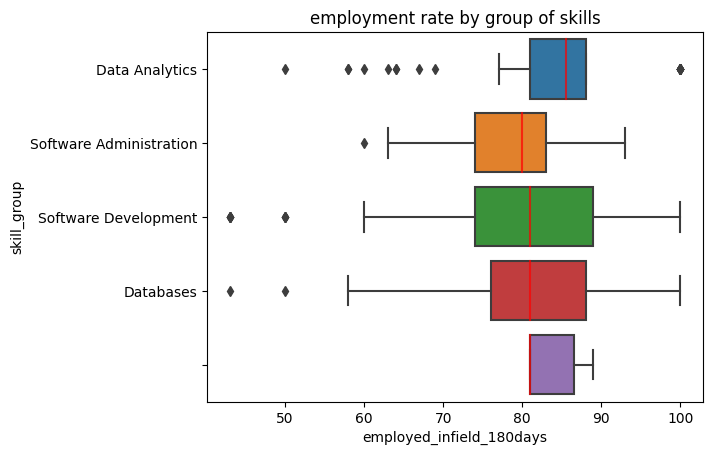

In [5]:
# create a plot for skill_group and employed_infield_180days

sns.boxplot(x = school_df['employed_infield_180days'], y = school_df['skill_group'], medianprops=dict(color="red", alpha=0.7))
plt.title('employment rate by group of skills')